Source: https://data.humdata.org/dataset/satellite-detected-water-extents-between-4-11-july-2024-in-bangladesh

In [4]:
import geopandas as gpd
import pandas as pd
import yaml
from rasterio.crs import CRS
from pathlib import Path
import fiona

In [5]:
yaml_file = '../events/bangladesh_coastal_flood_2024.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'bangladesh_coastal_flood_2024',
 'bounds': [88.96546265, 21.65505773, 91.33990759, 24.17825791],
 'event_date': '2024-07-08',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [150, 114],
 'mgrs_tiles': ['45QYE', '45QYF', '45QZE', '45QZF'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'UNOSAT via humanitarian data exchange',
 'links': ['https://data.humdata.org/dataset/satellite-detected-water-extents-between-4-11-july-2024-in-bangladesh',
  'https://reliefweb.int/disaster/fl-2024-000088-bgd']}

In [8]:
p = '../external_validation_data/unosat/bangladesh_flood_2024/TC20240502BGD.gdb/'

In [9]:
fiona.listlayers(p)


['PHR_20240604_AnalysisExtent_Morrelganj',
 'PHR_20240604_DamageAssessment_Morrelganj',
 'PHR_20240604_DamageAssessment_Paikgachha',
 'PHR_20240604_AnalysisExtent_Paikgachha',
 'PHR_20240604_AnalysisExtent_Rampal',
 'PHR_20240604_DamageAssessment_Rampal',
 'TDX1_20240601_FloodWater_Satkhira',
 'TDX1_20240601_AnalysisExtent_Satkhira',
 'WV2_20240610_AnalysisExtent_Shyamnagar',
 'WV2_20240610_DamageAssessment_Shyamnagar',
 'S1_20240619_20240622_AnalysisExtent_Sylhet',
 'S1_20240619_20240622_FloodExtent_Sylhet',
 'S1_20240619_20240622_WaterExtent_Sylhet',
 'SAOCOM_20240626_AnalysisExtent_Sylhet_1',
 'SAOCOM_20240626_PotentiallyAffectedRoad_Sylhet',
 'SAOCOM_20240626_FloodExtent_Sylhet',
 'SAOCOM_20240626_FloodedStructure_Sylhet',
 'GLOBAL_20240626_FloodExtent_Sunamganj',
 'GLOBAL_20240626_AnglysisExtent_Sunamganj',
 'GLOBAL_20240626_FloodedStructure_Sunamganj',
 'PHR_20240626_FloodExtent_SunamganjSadar',
 'PHR_20240626_AnglysisExtent_SunamganjSadar',
 'PHR_20240626_CloudObstruction_Sunamg

In [40]:
df_flood = gpd.read_file(p, layer='ST1_20240622_20240629_FloodExtent_Bangladesh')
df_flood = df_flood.to_crs(4326)
df_flood.head()

,Water_Class,Sensor_ID,Sensor_Date,Confidence_ID,Field_Validation,Water_StatusID,Notes,Area_m2,Area_ha,SenorID_old,StaffID,EventCode,SHAPE_Length,SHAPE_Area,geometry
0,2,42,2024-06-29 00:00:00+00:00,4,0,1,None,1.207202e+07,1207.201933,None,213,FL20240502BGD,4.922023,0.001063,"MULTIPOLYGON (((89.51460 22.92837, 89.51451 22..."
1,2,42,2024-06-29 00:00:00+00:00,4,0,1,None,2.953623e+06,295.362257,None,213,FL20240502BGD,1.566978,0.000260,"MULTIPOLYGON (((90.18886 22.90311, 90.18886 22..."
2,2,42,2024-06-29 00:00:00+00:00,4,0,1,None,1.220184e+06,122.018418,None,213,FL20240502BGD,0.837276,0.000108,"MULTIPOLYGON (((88.92619 23.62571, 88.92565 23..."
3,2,42,2024-06-29 00:00:00+00:00,4,0,1,None,1.325845e+06,132.584514,None,213,FL20240502BGD,0.584570,0.000117,"MULTIPOLYGON (((89.68772 23.21053, 89.68772 23..."
4,2,42,2024-06-29 00:00:00+00:00,4,0,1,None,5.652752e+07,5652.751799,None,213,FL20240502BGD,11.994240,0.004944,"MULTIPOLYGON (((90.05874 21.86457, 90.05847 21..."


<Axes: >

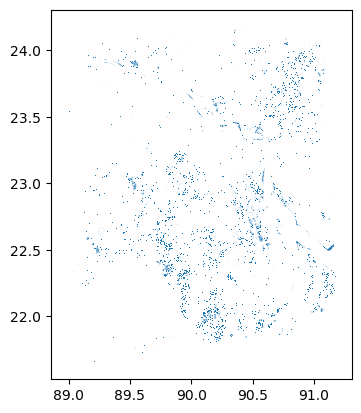

In [41]:
df_flood_coastal = df_flood.cx[89.2:91, 21.5: 24].reset_index(drop=True)
df_flood_coastal.plot()

In [42]:
df_flood_coastal.total_bounds

array([88.96544182, 21.65442891, 91.19868925, 24.17805507])

In [43]:
n = df_flood_coastal.shape[0]
df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name'] for k in range(n)],
                               'date': [pd.to_datetime(event_dict['event_date']) for k in range(n)],
                               'source_id': [f'{event_dict["source_id"]}' for k in range(n)]},
                              geometry=df_flood_coastal.geometry.tolist(),
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((89.51460 22.92837, 89.51451 22..."
1,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((90.18886 22.90311, 90.18886 22..."
2,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((89.68772 23.21053, 89.68772 23..."
3,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((90.05874 21.86457, 90.05847 21..."
4,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((89.24742 22.35109, 89.24733 22..."


In [44]:
geos_intersection = df_flood.geometry.intersection(box(*df_event_f.total_bounds))

In [60]:
from shapely.geometry import Polygon, MultiPolygon
geos_intersection_f = [geo for geo in geos_intersection if (not geo.is_empty) and (isinstance(geo, (Polygon, MultiPolygon))) ]
len(geos_intersection), len(geos_intersection_f)

(511, 245)

In [61]:
n = len(geos_intersection)
df_event_f2 = gpd.GeoDataFrame({'name': [event_dict['event_name'] for k in range(n)],
                               'date': [pd.to_datetime(event_dict['event_date']) for k in range(n)],
                               'source_id': [f'{event_dict["source_id"]}' for k in range(n)]},
                              geometry=geos_intersection,
                              crs=CRS.from_epsg(4326))
df_event_f2.head()

,name,date,source_id,geometry
0,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((89.51451 22.92837, 89.51451 22..."
1,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((90.18886 22.90296, 90.18881 22..."
2,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((89.00732 23.62769, 89.00732 23..."
3,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((89.68772 23.21045, 89.68750 23..."
4,bangladesh_coastal_flood_2024,2024-07-08,UNOSAT via humanitarian data exchange,"MULTIPOLYGON (((90.05847 21.86457, 90.05847 21..."


In [62]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [63]:
df_event_f2.to_parquet(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.parquet')

In [68]:
#df_event_f2.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')

# Extents

In [65]:
from shapely.geometry import box
df_aoi = gpd.read_file(p, layer='ST1_20240622_20240629_AnalysisExtent_Bangladesh')
df_aoi = df_aoi.to_crs(4326)
df_aoi.geometry = df_aoi.geometry.intersection(box(*df_event_f.total_bounds))
df_aoi.head()

,SensorDate,SensorID,Notes,Area_m2,GlobalID,StaffID,EventCode,Area_ha,SHAPE_Length,SHAPE_Area,geometry
0,2024-06-29 00:00:00+00:00,42,None,1.398520e+11,{3EF96309-C5FD-4805-AE6C-271B7C907863},213,FL20240502BGD,None,110.307505,12.396584,"MULTIPOLYGON (((89.24840 21.68909, 89.25006 21..."


<Axes: >

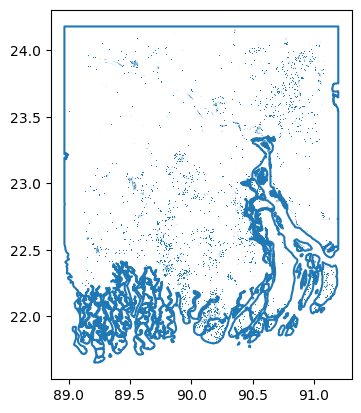

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_aoi.boundary.plot(ax=ax)
df_event_f.plot(ax=ax)

In [67]:
EXTERNAL_VAL_EXTENTS = Path('../external_validation_data_extents_db/')
EXTERNAL_VAL_EXTENTS.mkdir(exist_ok=True, parents=True)

df_aoi.to_file(EXTERNAL_VAL_EXTENTS / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')